# Plots by the state with relative/absolute numbers of Microsoft AI roads

In [1]:
import os
import json
import pandas as pd
import re
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


## Data preparation

### Definitions

In [2]:
# dictionary definitions

data_dic = {0: "roads_continent_data_18-23_ai.json",
            1: "roads_africa_states_18-23_ai.json",
            2: "roads_northamerica_states_18-23_ai.json",
            3: "roads_europe_states_18-23_ai.json",
            4: "roads_asia_states_18-23_ai.json",}
geojson_folder_dic = {0: "geojson-continent-states",
                      1: "geojson-africa-states",
                      2: "geojson-northamerica-states",
                      3: "geojson-europe-states",
                      4: "geojson-asia-states",}

In [3]:
# user input definition

while True:
    try:
        user_d_spec = int(input("Which data do you want to plot?\
                            Enter 0 for stats by continents (2018–2023),\
                            1 for stats by Africa states (2018–2023),\
                            2 for stats by North-Central America states (2018–2023),\
                            3 for stats by Europe states (2018–2023),\
                            4 for stats by Asia states (2018–2023):"
                                ))
    except ValueError:
        print("Please enter a number.")
        continue
    if user_d_spec not in range(len(data_dic)):
        print("Please enter 0, 1, 2, 3 or 4.")
        continue
    break


In [4]:
# function definitions

def data_spec(data_dic):

    try:
        with open(f"downloaded-data\\{data_dic}", "r") as f:
            data = json.load(f)
        return data
    except Exception as e:
        print(e)
        print("Please download the data first.")

def get_geojson_names(home_dir, geojson_folder_dic):
    geojson_dir = os.path.join(
        home_dir, f"geojson-regions\\{geojson_folder_dic}", "")

    geojson_names = []
    for (dir_path, dir_names, file_names) in os.walk(geojson_dir):
        geojson_names.extend(file_names)
    print(geojson_names)
    return geojson_names


### Load the data

In [5]:
os.chdir('..')

data = data_spec(data_dic[user_d_spec])

home_dir = os.getcwd()


### Edit the obtained data into desired shape to create a DataFrame

In [6]:
d = {
    "feature": [],
    "source": [],
    "timestamp": [],
    "value": []
}


In [7]:
for region in data:
    for dic1 in region:
        feature, source = dic1["groupByObject"][0], dic1["groupByObject"][1]
        for res in dic1["result"]:
            d["feature"].append(feature)
            d["source"].append(source)
            d["timestamp"].append(res["timestamp"])
            d["value"].append(res["value"])

df = pd.DataFrame(d)
# df

In [8]:
# extract only the year
df["year"] = pd.to_datetime(df["timestamp"]).dt.year

In [9]:
df.dtypes

feature       object
source        object
timestamp     object
value        float64
year           int64
dtype: object

In [10]:
# handle wrong feature name of Egypt

# if user_d_spec == 1:
#     df.loc[df["feature"] == "feature1", "feature"] = 46


In [11]:
# df

### Append the names of the regions to the DataFrame

In [12]:
# extract the geojson IDs and the names
geojson_names = get_geojson_names(home_dir, geojson_folder_dic[user_d_spec])


['0_Ethiopia.geojson', '10_Democratic Republic of the Congo.geojson', '11_Namibia.geojson', '12_South Africa.geojson', '13_Libya.geojson', '14_Tunisia.geojson', '15_Zambia.geojson', '16_Sierra Leone.geojson', '17_Guinea.geojson', '18_Liberia.geojson', '19_Central African Republic.geojson', '1_South Sudan.geojson', '20_Sudan.geojson', '21_Djibouti.geojson', '22_Eritrea.geojson', '23_Ivory Coast.geojson', '24_Mali.geojson', '25_Senegal.geojson', '26_Nigeria.geojson', '27_Benin.geojson', '28_Angola.geojson', '29_Botswana.geojson', '2_Somalia.geojson', '30_Zimbabwe.geojson', '31_Chad.geojson', '32_Algeria.geojson', '33_Mozambique.geojson', '34_Eswatini.geojson', '35_Burundi.geojson', '36_Rwanda.geojson', '37_Uganda.geojson', '38_Lesotho.geojson', '39_Cameroon.geojson', '3_Kenya.geojson', '40_Gabon.geojson', '41_Niger.geojson', '42_Burkina Faso.geojson', '43_Togo.geojson', '44_Ghana.geojson', '45_Guinea-Bissau.geojson', '46_Egypt.geojson', '47_Mauritania.geojson', '48_Equatorial Guinea.geoj

In [13]:
geojson_names_2 = geojson_names

id_name_dic = {int(re.search(r'^\d+', k)[0]): re.search(r'\_.+\.', v)[0][1:-1] # using lib RegularExpression to separate the ID number and the state name
                for k, v in zip(geojson_names, geojson_names_2)}
id_name_ser = pd.Series(id_name_dic)
id_name_df = pd.DataFrame(id_name_ser, columns=["name"])
id_name_df = id_name_df.reset_index().rename(columns={"index": "id"})
id_name_df["id"] = id_name_df["id"].astype(int)
# id_name_df


In [14]:
# merge df with region names based on IDs
df = df.merge(id_name_df, how="left", left_on="feature",
               right_on="id")
# df.head(20)

In [15]:
df

,feature,source,timestamp,value,year,id,name
0,0,remainder,2018-01-01T00:00:00Z,1.804876e+08,2018,0.0,Ethiopia
1,0,remainder,2019-01-01T00:00:00Z,2.293306e+08,2019,0.0,Ethiopia
2,0,remainder,2020-01-01T00:00:00Z,2.415439e+08,2020,0.0,Ethiopia
3,0,remainder,2021-01-01T00:00:00Z,2.604690e+08,2021,0.0,Ethiopia
4,0,remainder,2022-01-01T00:00:00Z,2.863366e+08,2022,0.0,Ethiopia
...,...,...,...,...,...,...,...
655,9,source=maxar,2019-01-01T00:00:00Z,0.000000e+00,2019,9.0,Republic of the Congo
656,9,source=maxar,2020-01-01T00:00:00Z,0.000000e+00,2020,9.0,Republic of the Congo
657,9,source=maxar,2021-01-01T00:00:00Z,0.000000e+00,2021,9.0,Republic of the Congo
658,9,source=maxar,2022-01-01T00:00:00Z,7.901474e+04,2022,9.0,Republic of the Congo


### Filtering the data

In [16]:
# get the number of AI  (source=microsoft/BuildingFootprints) / manually mapped (remainder) roads for every year
grouped = df.groupby(["name", "year"])["value"].sum()
# grouped

In [17]:
grouped


name      year
Algeria   2018    2.092695e+08
          2019    2.243742e+08
          2020    2.475910e+08
          2021    2.644392e+08
          2022    2.855570e+08
                      ...     
Zimbabwe  2019    1.584283e+08
          2020    2.263872e+08
          2021    2.330476e+08
          2022    2.447944e+08
          2023    2.472461e+08
Name: value, Length: 324, dtype: float64

In [18]:
# merge the DataFrame with groupBy DataFrame and compute the percentage
merged_data = df.merge(grouped, on=["name", "year"], how="left", )
merged_data = merged_data.rename(columns={"value_x": "len_of_roads", "value_y": "total_roads"})
merged_data["percentage"] = (merged_data["len_of_roads"] / merged_data["total_roads"]) * 100
# merged_data.head(10)


In [19]:
# percentage verification
merged_data.groupby(["name", "year"])["percentage"].sum()


name      year
Algeria   2018    100.0
          2019    100.0
          2020    100.0
          2021    100.0
          2022    100.0
                  ...  
Zimbabwe  2019    100.0
          2020    100.0
          2021    100.0
          2022    100.0
          2023    100.0
Name: percentage, Length: 324, dtype: float64

In [20]:
df_ai_rel = merged_data.loc[(merged_data["year"] == 2023) &
                            (merged_data["source"] == "source=maxar"), :]
df_ai_rel.head()


,feature,source,timestamp,len_of_roads,year,id,name,total_roads,percentage
11,0,source=maxar,2023-01-01T00:00:00Z,12435673.65,2023,0.0,Ethiopia,3.134066e+08,3.967904
23,10,source=maxar,2023-01-01T00:00:00Z,10609373.93,2023,10.0,Democratic Republic of the Congo,4.807715e+08,2.206739
35,11,source=maxar,2023-01-01T00:00:00Z,9153.77,2023,11.0,Namibia,1.433434e+08,0.006386
47,12,source=maxar,2023-01-01T00:00:00Z,869679.35,2023,12.0,South Africa,7.939535e+08,0.109538
59,13,source=maxar,2023-01-01T00:00:00Z,1327983.89,2023,13.0,Libya,1.445171e+08,0.918911


In [21]:
len(df_ai_rel)


55

In [22]:
df_ai_rel


,feature,source,timestamp,len_of_roads,year,id,name,total_roads,percentage
11,0,source=maxar,2023-01-01T00:00:00Z,1.243567e+07,2023,0.0,Ethiopia,3.134066e+08,3.967904
23,10,source=maxar,2023-01-01T00:00:00Z,1.060937e+07,2023,10.0,Democratic Republic of the Congo,4.807715e+08,2.206739
35,11,source=maxar,2023-01-01T00:00:00Z,9.153770e+03,2023,11.0,Namibia,1.433434e+08,0.006386
47,12,source=maxar,2023-01-01T00:00:00Z,8.696793e+05,2023,12.0,South Africa,7.939535e+08,0.109538
59,13,source=maxar,2023-01-01T00:00:00Z,1.327984e+06,2023,13.0,Libya,1.445171e+08,0.918911
71,14,source=maxar,2023-01-01T00:00:00Z,3.719130e+05,2023,14.0,Tunisia,1.620786e+08,0.229465
83,15,source=maxar,2023-01-01T00:00:00Z,3.788389e+06,2023,15.0,Zambia,2.935390e+08,1.290591
95,16,source=maxar,2023-01-01T00:00:00Z,6.020959e+05,2023,16.0,Sierra Leone,5.993719e+07,1.004545
107,17,source=maxar,2023-01-01T00:00:00Z,6.109332e+05,2023,17.0,Guinea,1.707299e+08,0.357836
119,18,source=maxar,2023-01-01T00:00:00Z,2.113008e+05,2023,18.0,Liberia,3.738373e+07,0.565221


In [23]:
# Asia 5, Europe 0.1, Africa 4
df_ai_rel = df_ai_rel.loc[df_ai_rel["percentage"] > 4, :]


### Plots

#### Relative numbers

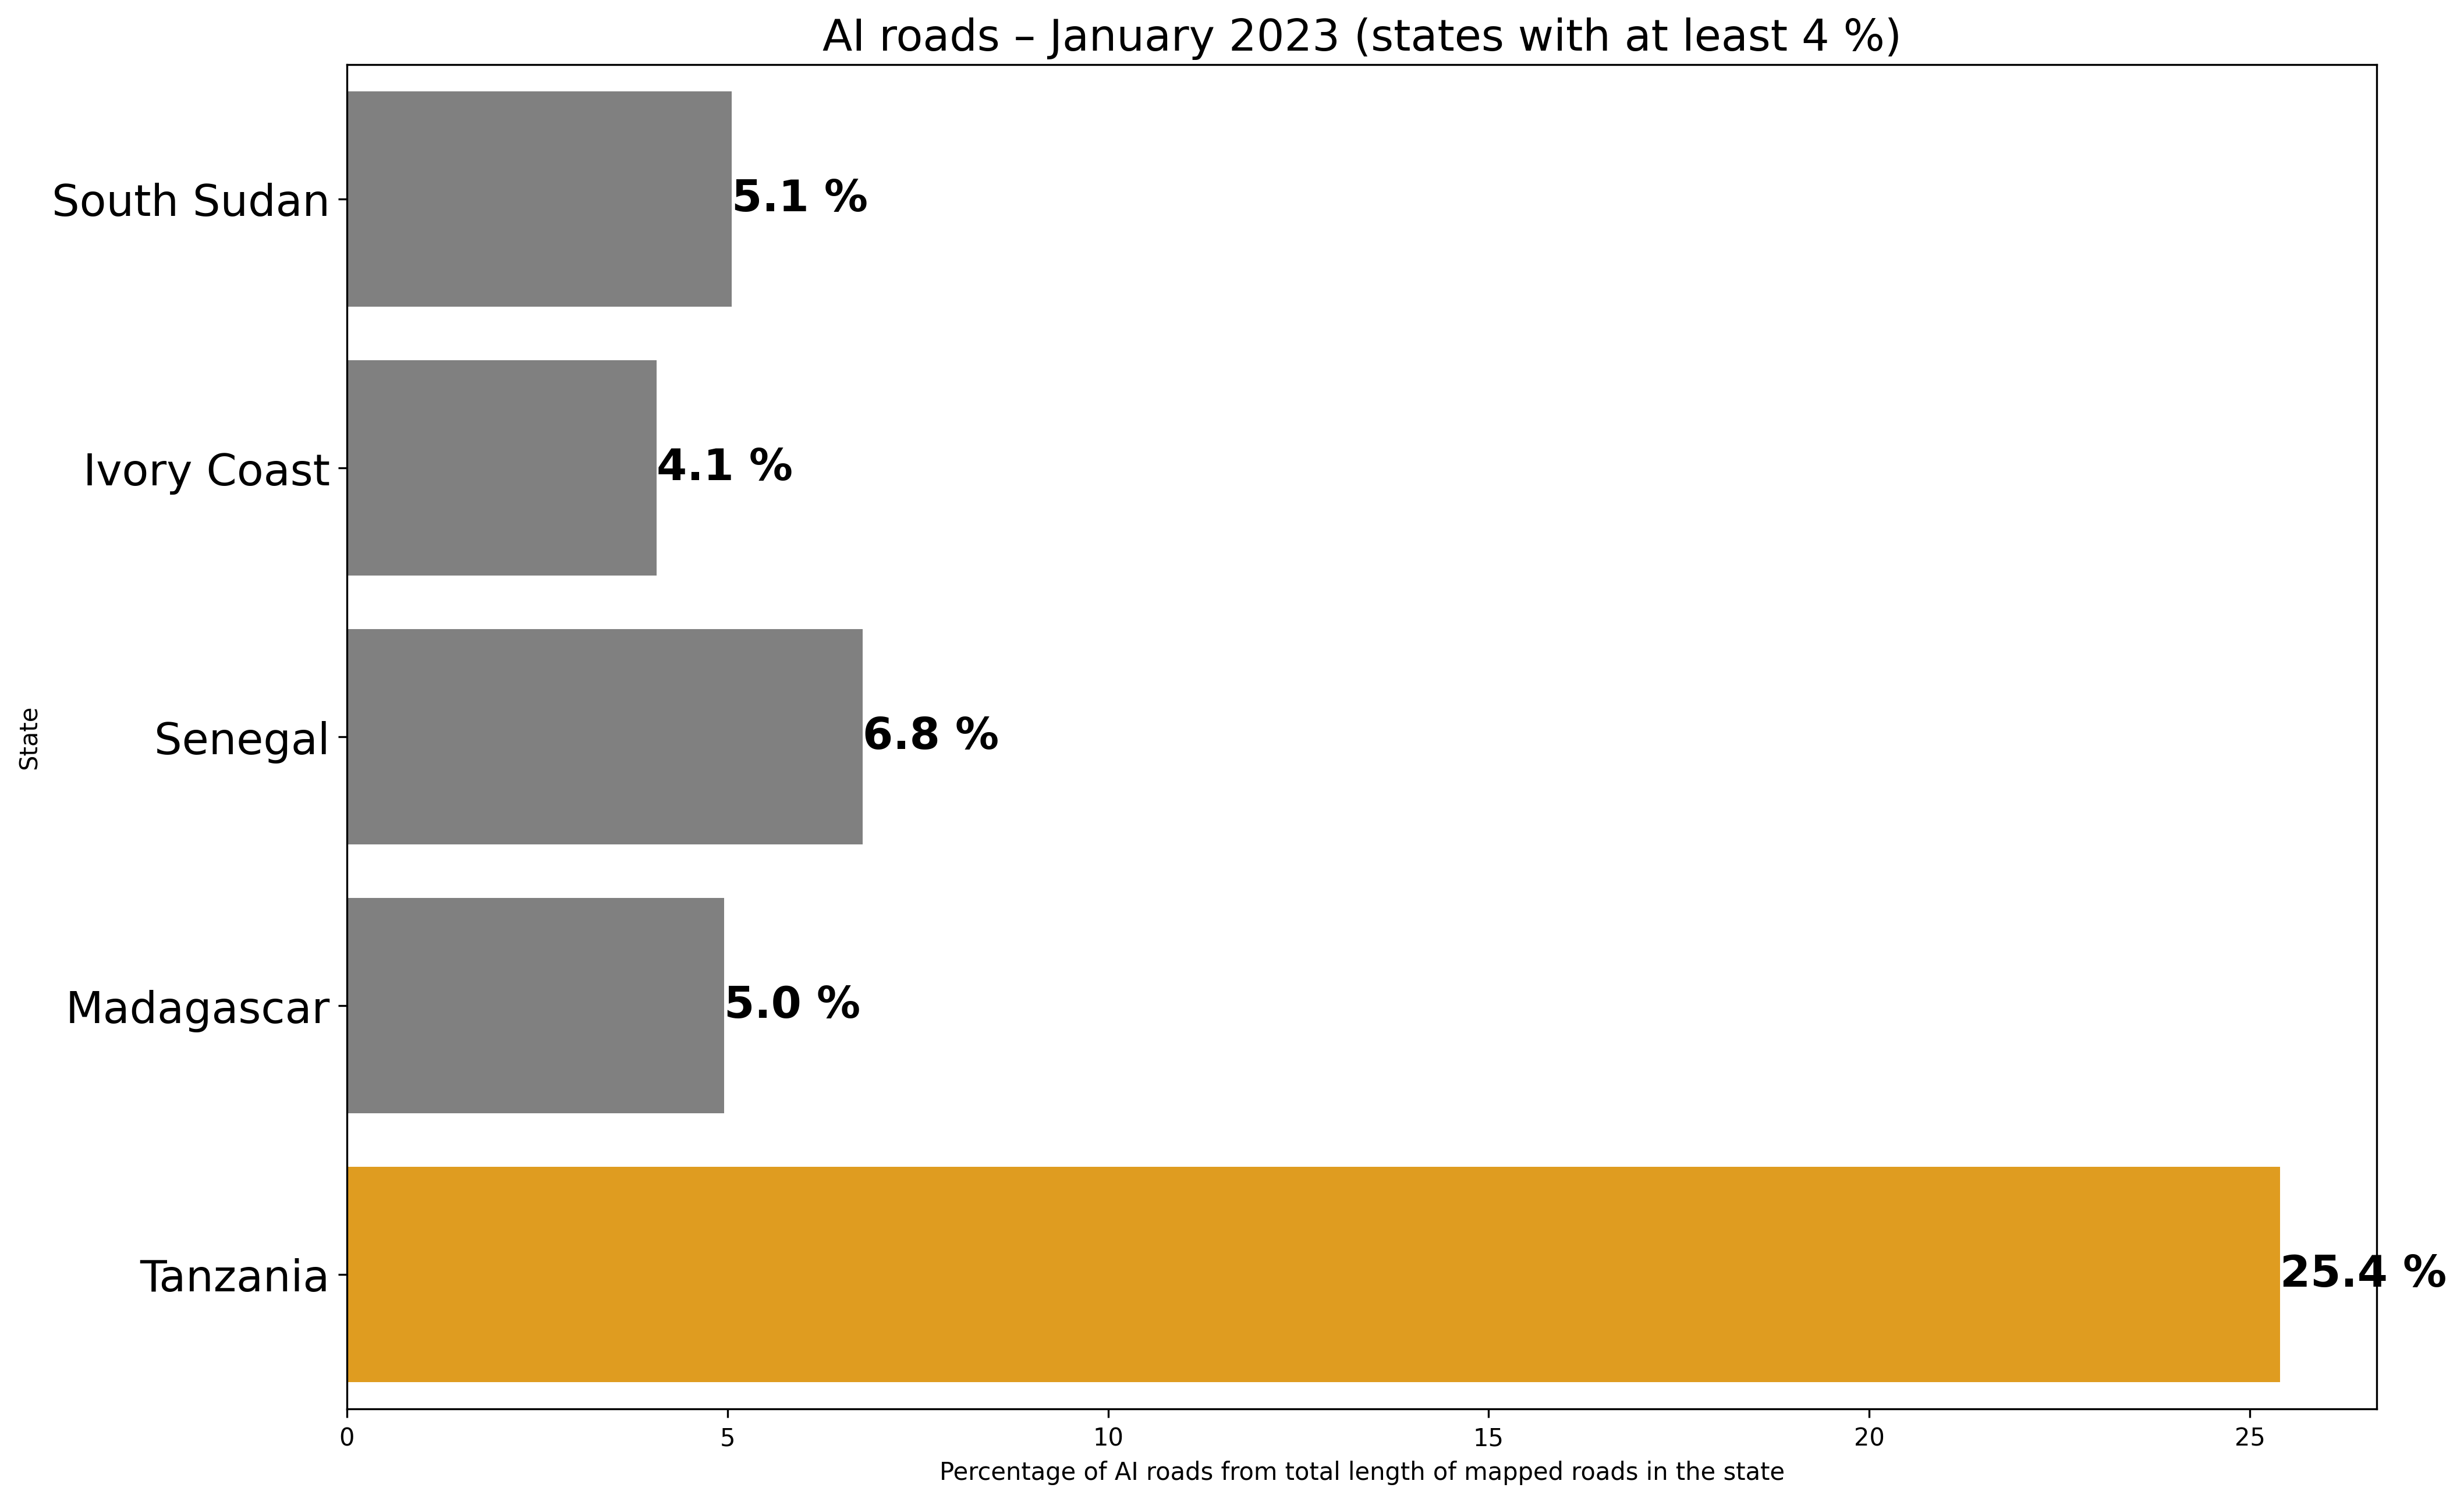

In [41]:
fig, ax = plt.subplots(figsize=(15, 10), dpi=300)

# use orange for bar with max value and grey for all other bars
cols = ['grey' if (x < max(df_ai_rel["percentage"]))
        else 'orange' for x in df_ai_rel["percentage"]]

# create horizontal barplot
sns.barplot(x=df_ai_rel["percentage"], y=df_ai_rel["name"], orient='h', palette=cols, ax=ax,)


# add percentage labels
for i, percent in enumerate(df_ai_rel["percentage"]):
    if np.isfinite(percent):
        ax.text(percent, i, str(round(percent, 1)) +
                ' %', ha='left', va='center', fontsize=18, fontweight='bold', color='black')


        
# Set axis labels and title
ax.set_xlabel('Percentage of AI roads from total length of mapped roads in the state')
ax.set_ylabel('State')
ax.set_title('AI roads – January 2023 (states with at least 4 %)', fontsize=18)

plt.yticks(fontsize=18)

plt.show()



#### Absolute numbers

In [25]:
df_ai_abs = merged_data.loc[(merged_data["year"] == 2023) & (merged_data["source"] == "source=maxar") & (merged_data["len_of_roads"] > 100), :]
df_ai_abs.head()


,feature,source,timestamp,len_of_roads,year,id,name,total_roads,percentage
11,0,source=maxar,2023-01-01T00:00:00Z,12435673.65,2023,0.0,Ethiopia,3.134066e+08,3.967904
23,10,source=maxar,2023-01-01T00:00:00Z,10609373.93,2023,10.0,Democratic Republic of the Congo,4.807715e+08,2.206739
35,11,source=maxar,2023-01-01T00:00:00Z,9153.77,2023,11.0,Namibia,1.433434e+08,0.006386
47,12,source=maxar,2023-01-01T00:00:00Z,869679.35,2023,12.0,South Africa,7.939535e+08,0.109538
59,13,source=maxar,2023-01-01T00:00:00Z,1327983.89,2023,13.0,Libya,1.445171e+08,0.918911


In [26]:
# Asia 10000000, Europe 500000, Africa 10000000
df_ai_abs = df_ai_abs.loc[df_ai_abs["len_of_roads"] > 10000000, :]


In [27]:
df_ai_abs


,feature,source,timestamp,len_of_roads,year,id,name,total_roads,percentage
11,0,source=maxar,2023-01-01T00:00:00Z,1.243567e+07,2023,0.0,Ethiopia,3.134066e+08,3.967904
23,10,source=maxar,2023-01-01T00:00:00Z,1.060937e+07,2023,10.0,Democratic Republic of the Congo,4.807715e+08,2.206739
215,25,source=maxar,2023-01-01T00:00:00Z,1.096257e+07,2023,25.0,Senegal,1.618069e+08,6.775093
227,26,source=maxar,2023-01-01T00:00:00Z,1.151075e+07,2023,26.0,Nigeria,7.889574e+08,1.458982
563,51,source=maxar,2023-01-01T00:00:00Z,2.403950e+07,2023,51.0,Madagascar,4.848287e+08,4.958349
611,5,source=maxar,2023-01-01T00:00:00Z,1.892376e+08,2023,5.0,Tanzania,7.450404e+08,25.399638


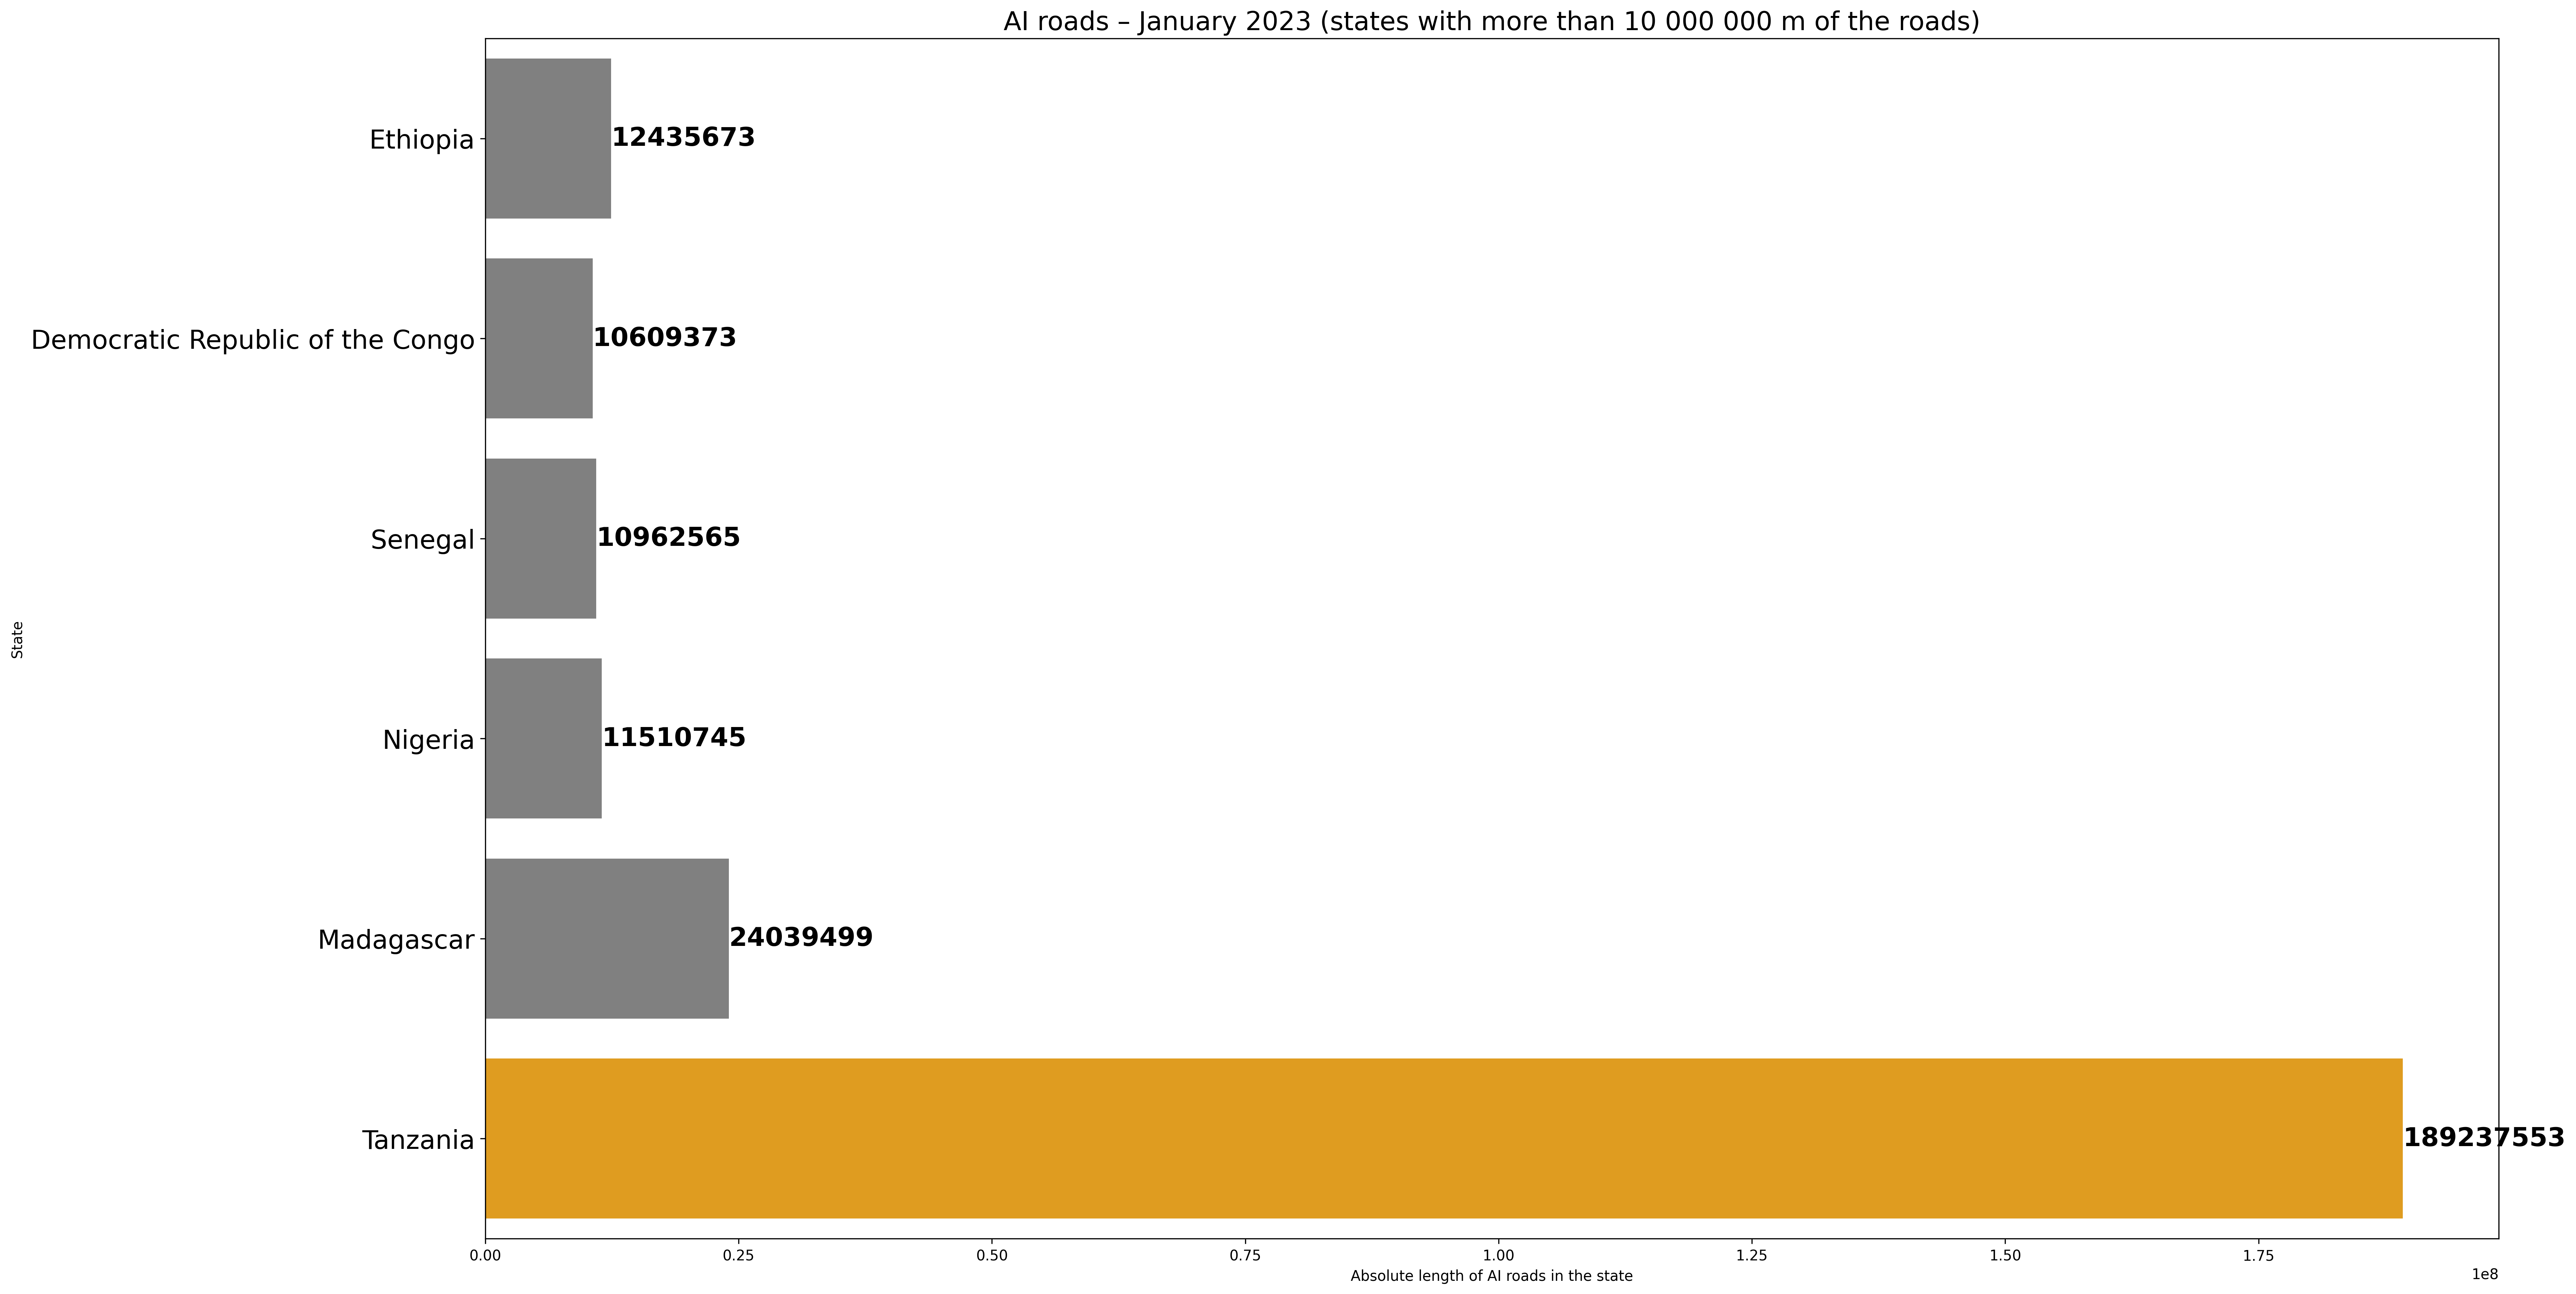

In [39]:
fig, ax = plt.subplots(figsize=(25, 15), dpi=300)

# use orange for bar with max value and grey for all other bars
cols = ['grey' if (x < max(df_ai_abs["len_of_roads"]))
        else 'orange' for x in df_ai_abs["len_of_roads"]]

# create horizontal barplot
sns.barplot(x=df_ai_abs["len_of_roads"],
            y=df_ai_abs["name"], orient='h', palette=cols, ax=ax)


# add percentage labels
for i, num in enumerate(df_ai_abs["len_of_roads"]):
    if np.isfinite(num):
        ax.text(num, i, str(int(num)), ha='left', va='center', fontsize=18, fontweight='bold', color='black')

# Set axis labels and title
ax.set_xlabel('Absolute length of AI roads in the state')
ax.set_ylabel('State')
ax.set_title('AI roads – January 2023 (states with more than 10 000 000 m of the roads)', fontsize=18)

plt.yticks(fontsize=18)

plt.show()


#### Plotly lib

In [29]:
# Create the horizontal percentage bar chart
fig = px.bar(df_ai_rel, x='percentage', y='name', orientation='h')

# Set the x-axis limit to 100
fig.update_xaxes(range=[0, 100])

# Customize the chart
fig.update_traces(marker_color='skyblue', marker_line_color='black',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title='Percentage of AI roads from total length of mapped roads in the state',
                  xaxis_title='Percentage of AI roads from total length of mapped roads in the state',
                  yaxis_title='State',
                  height=1000)

# Display the chart
fig.show()
